# Power time series
Goal is to visualise results at the experiment and benchmark level.
For easier plotting, we interpolate the values to fill the missing values.

## Imports and variables

In [1]:
REPOSITORY_DIR = "../../" # TO MODIFY
prefix = [REPOSITORY_DIR + "results/GPU_20_04/", REPOSITORY_DIR + "results/GPU_19_04/"] # ADD AS MANY FOLDER AS YOU NEED
#prefix = [REPOSITORY_DIR + "results/CPU_08_11/"]

import sys
sys.path.append(REPOSITORY_DIR + "code/")
import pandas as pd
import matplotlib.pyplot as plt
import time

from utils.plots import plot_subplot_per_appli_per_class, FONTSIZE, LINESTYLES, COLOR, plot_quantiles_of_one_bench
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
import pandas as pd

## Data

In [2]:
energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])
exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

The BMC and the wattmeter don't have the same timestamp so we need to merge them: 

In [3]:
grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
grouped_watt_df[:15]

,timestamp_sec,wattmetre_power_watt,bmc_node_power_watt
0,1.650389e+09,1007.095,900.0
1,1.650389e+09,1010.934,NaN
2,1.650389e+09,1013.723,NaN
3,1.650389e+09,1015.789,NaN
4,1.650389e+09,1015.270,NaN
5,1.650389e+09,1015.574,900.0
6,1.650389e+09,1016.959,NaN
7,1.650389e+09,1016.043,NaN
8,1.650389e+09,1016.135,NaN
9,1.650389e+09,1003.961,NaN


In [4]:
grouped_watt_df['timestamp'] = pd.to_datetime(grouped_watt_df['timestamp_sec'].apply(lambda x: time.asctime(time.localtime(x))))

## Interpolation
Then we interpolate the BMC values to have as many values as the wattmeter:

In [5]:
interpolated_df = grouped_watt_df.copy()
interpolated_df['bmc_node_power_watt'] = interpolated_df['bmc_node_power_watt'].interpolate(method='linear')
interpolated_df[:15]

,timestamp_sec,wattmetre_power_watt,bmc_node_power_watt,timestamp
0,1.650389e+09,1007.095,900.0,2022-04-19 19:26:44
1,1.650389e+09,1010.934,900.0,2022-04-19 19:26:45
2,1.650389e+09,1013.723,900.0,2022-04-19 19:26:46
3,1.650389e+09,1015.789,900.0,2022-04-19 19:26:47
4,1.650389e+09,1015.270,900.0,2022-04-19 19:26:48
5,1.650389e+09,1015.574,900.0,2022-04-19 19:26:49
6,1.650389e+09,1016.959,885.6,2022-04-19 19:26:50
7,1.650389e+09,1016.043,871.2,2022-04-19 19:26:51
8,1.650389e+09,1016.135,856.8,2022-04-19 19:26:52
9,1.650389e+09,1003.961,842.4,2022-04-19 19:26:53


Another interpolation to match Energy Scope frequency:

In [6]:
interpolated_df = interpolated_df.set_index('timestamp').resample('500ms').interpolate(method='linear')
interpolated_df[:15]

,timestamp_sec,wattmetre_power_watt,bmc_node_power_watt
timestamp,,,
2022-04-19 19:26:44.000,1.650389e+09,1007.0950,900.0
2022-04-19 19:26:44.500,1.650389e+09,1009.0145,900.0
2022-04-19 19:26:45.000,1.650389e+09,1010.9340,900.0
2022-04-19 19:26:45.500,1.650389e+09,1012.3285,900.0
2022-04-19 19:26:46.000,1.650389e+09,1013.7230,900.0
2022-04-19 19:26:46.500,1.650389e+09,1014.7560,900.0
2022-04-19 19:26:47.000,1.650389e+09,1015.7890,900.0
2022-04-19 19:26:47.500,1.650389e+09,1015.5295,900.0
2022-04-19 19:26:48.000,1.650389e+09,1015.2700,900.0


In [7]:
interpolated_df = interpolated_df.reset_index().drop(columns='timestamp')
interpolated_df

,timestamp_sec,wattmetre_power_watt,bmc_node_power_watt
0,1.650389e+09,1007.0950,900.0
1,1.650389e+09,1009.0145,900.0
2,1.650389e+09,1010.9340,900.0
3,1.650389e+09,1012.3285,900.0
4,1.650389e+09,1013.7230,900.0
...,...,...,...
270300,1.650524e+09,911.7510,828.0
270301,1.650524e+09,910.5545,828.0
270302,1.650524e+09,909.3580,828.0
270303,1.650524e+09,910.8970,828.0


# Merge
Outer merge to keep all values.

In [8]:
merged_df = pd.merge(energy_scope_df,interpolated_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec']).dropna()
merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])

In [9]:
merged_df[['timestamp_sec', 'data.data.etotal(W)','wattmetre_power_watt', 'bmc_node_power_watt']][:15]

,timestamp_sec,data.data.etotal(W),wattmetre_power_watt,bmc_node_power_watt
13293,1.650389e+09,638.859,1013.7230,900.0
13294,1.650389e+09,638.859,1014.7560,900.0
13295,1.650389e+09,633.505,1015.7890,900.0
13296,1.650389e+09,633.842,1015.5295,900.0
13297,1.650389e+09,633.483,1015.2700,900.0
13298,1.650389e+09,634.702,1015.4220,900.0
13299,1.650389e+09,634.073,1015.5740,900.0
13300,1.650389e+09,632.930,1016.2665,892.8
13301,1.650389e+09,634.147,1016.9590,885.6
13302,1.650389e+09,633.926,1016.5010,878.4


In [10]:
b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df)

In [11]:
b_df

,data.data.etotal(W),data.data.ecpu(W),data.data.edram(W),arch.0.data.ecpu(W),arch.0.data.edram(W),arch.1.data.ecpu(W),arch.1.data.edram(W),arch.gpu-nvidia-0.data.ecpu(W),arch.gpu-nvidia-0.data.edram(W),arch.gpu-nvidia-1.data.ecpu(W),...,arch.gpu-nvidia-6.data.edram(W),arch.gpu-nvidia-7.data.ecpu(W),arch.gpu-nvidia-7.data.edram(W),timestamp_sec,wattmetre_power_watt,bmc_node_power_watt,wattmetre_es_diff,sec,benchmark_id,benchmark_appli
0,648.161,622.502,25.659,74.452,12.663,70.820,12.996,58.541,0.0,60.998,...,0.0,59.283,0.0,1.650524e+09,1011.444000,856.8,363.283000,0.0,768_1_0,IDLE sh
1,648.161,622.502,25.659,74.452,12.663,70.820,12.996,58.541,0.0,60.998,...,0.0,59.283,0.0,1.650524e+09,1011.340000,867.6,363.179000,0.5,768_1_0,IDLE sh
2,644.223,618.735,25.488,74.076,12.486,70.934,13.002,58.042,0.0,60.497,...,0.0,58.865,0.0,1.650524e+09,1011.236000,878.4,367.013000,1.0,768_1_0,IDLE sh
3,644.002,618.404,25.598,74.210,12.605,70.969,12.993,57.920,0.0,60.367,...,0.0,58.907,0.0,1.650524e+09,1011.222000,889.2,367.220000,1.5,768_1_0,IDLE sh
4,645.152,619.561,25.591,74.324,12.627,70.844,12.964,58.133,0.0,60.585,...,0.0,58.824,0.0,1.650524e+09,1011.208000,900.0,366.056000,2.0,768_1_0,IDLE sh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,540.745,515.113,25.632,72.600,12.496,70.500,13.136,45.590,0.0,47.530,...,0.0,45.577,0.0,1.650435e+09,889.242000,792.0,348.497000,126.5,291_0_3,EP E
254,539.367,513.798,25.569,72.514,12.476,70.373,13.093,45.415,0.0,47.345,...,0.0,45.518,0.0,1.650435e+09,888.983000,792.0,349.616000,127.0,291_0_3,EP E
255,539.953,514.326,25.627,72.532,12.504,70.517,13.123,45.521,0.0,47.462,...,0.0,45.554,0.0,1.650435e+09,888.922864,792.0,348.969864,127.5,291_0_3,EP E
256,540.947,515.483,25.464,72.588,12.402,70.572,13.062,45.650,0.0,47.590,...,0.0,45.585,0.0,1.650435e+09,888.862727,792.0,347.915727,128.0,291_0_3,EP E


# Total power timeseries

/Users/mathildepro/Documents/code_projects/GPU_benchmarks/code/utils/plots.py:428: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


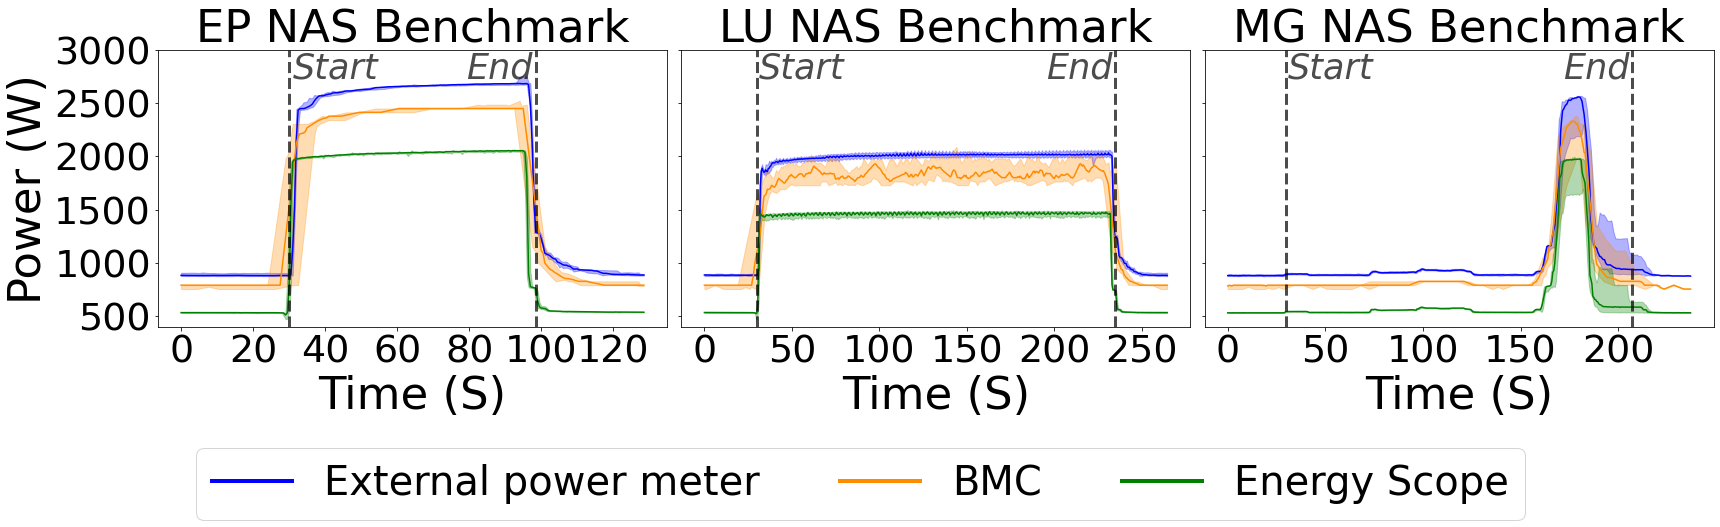

In [21]:
COLOR = plt.cm.Set1
COLOR = ['blue', 'darkorange', 'green', 'silver']
FONTSIZE=45
legend_fontsize=40
cols = [col for col in b_df.columns.unique() if 'power_watt' in col or 'total' in col]
cols = ['wattmetre_power_watt', 'bmc_node_power_watt', 'data.data.etotal(W)']
ymin, ymax = 400,3000
total_fig, total_axes, total_legend_labels = plot_subplot_per_appli_per_class(
    exp_table[exp_table['gpu_0_appli']!="idle"].sort_values(by=['gpu_0_appli']), 
    b_df, 
    cols, 
    FONTSIZE, 
    [' ', '-', ' '], 
    COLOR, 
    legend_fontsize=legend_fontsize,
    FIGSIZE=(24,6),
    bench_plot_fct=plot_quantiles_of_one_bench, 
    stat_cols=['min', '50%', 'max'],
    plot_limits=(ymin, ymax), 
    if_col_legend=True, 
    if_bench_legend=False,
    bbox_to_anchor=(0.5,-0.2),
    loc='upper center',
    nb_cols=3,
    ncol_legend=2,
    )
for i in range(len(total_axes[0])):
    if i==1:
        leg = total_axes[0][i].get_legend()
        print(leg.get_label())
    total_axes[0][i].get_legend().remove()

    # Adding left and right vertical lignes with labels
    # Start line
    line_position_x = 30 # Time before launch of benchmarks
    text_position_x = line_position_x + 1

    total_axes[0][i].vlines(line_position_x, ymin=ymin, ymax=ymax, color='black', alpha=0.7, linewidth=3, linestyle='--') # 
    total_axes[0][i].text(text_position_x, ymax-15, "Start", fontsize=FONTSIZE-10, ha='left', va='top', alpha=0.7, fontstyle= 'italic',)
    
    # End line
    # Assuming the right marge is equal to the left one
    line_position_x = total_axes[0][i].get_xbound()[1] - 30 - abs(total_axes[0][i].get_xbound()[0])
    text_position_x = line_position_x - 1
    
    total_axes[0][i].vlines(line_position_x, ymin=ymin, ymax=ymax, color='black', alpha=0.7, linewidth=3, linestyle='--') # 
    total_axes[0][i].text(text_position_x, ymax-15, "End", fontsize=FONTSIZE-10, ha='right', va='top', alpha=0.7, fontstyle= 'italic',)

#total_fig.tight_layout()
total_fig.legend(
    leg.get_lines(), 
    total_legend_labels, 
    bbox_to_anchor=(0.5,0), 
    loc='upper center',
    fontsize=legend_fontsize,
    ncol=3
)
total_fig.tight_layout()
total_fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/timeserie_total_plots.png",
    bbox_inches='tight',)
total_fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/timeserie_total_plots.pdf",
    bbox_inches='tight',)

In [13]:
total_axes[0][0].get_xbound()

(-6.425000000000001, 134.925)

# Ressource power timeseries

In [14]:
cols = [col for col in b_df.columns.unique() if 'arch' in col and not ('gpu' in col and 'dram' in col)]
cols.sort()
cols

['arch.0.data.ecpu(W)',
 'arch.0.data.edram(W)',
 'arch.1.data.ecpu(W)',
 'arch.1.data.edram(W)',
 'arch.gpu-nvidia-0.data.ecpu(W)',
 'arch.gpu-nvidia-1.data.ecpu(W)',
 'arch.gpu-nvidia-2.data.ecpu(W)',
 'arch.gpu-nvidia-3.data.ecpu(W)',
 'arch.gpu-nvidia-4.data.ecpu(W)',
 'arch.gpu-nvidia-5.data.ecpu(W)',
 'arch.gpu-nvidia-6.data.ecpu(W)',
 'arch.gpu-nvidia-7.data.ecpu(W)']

Legend


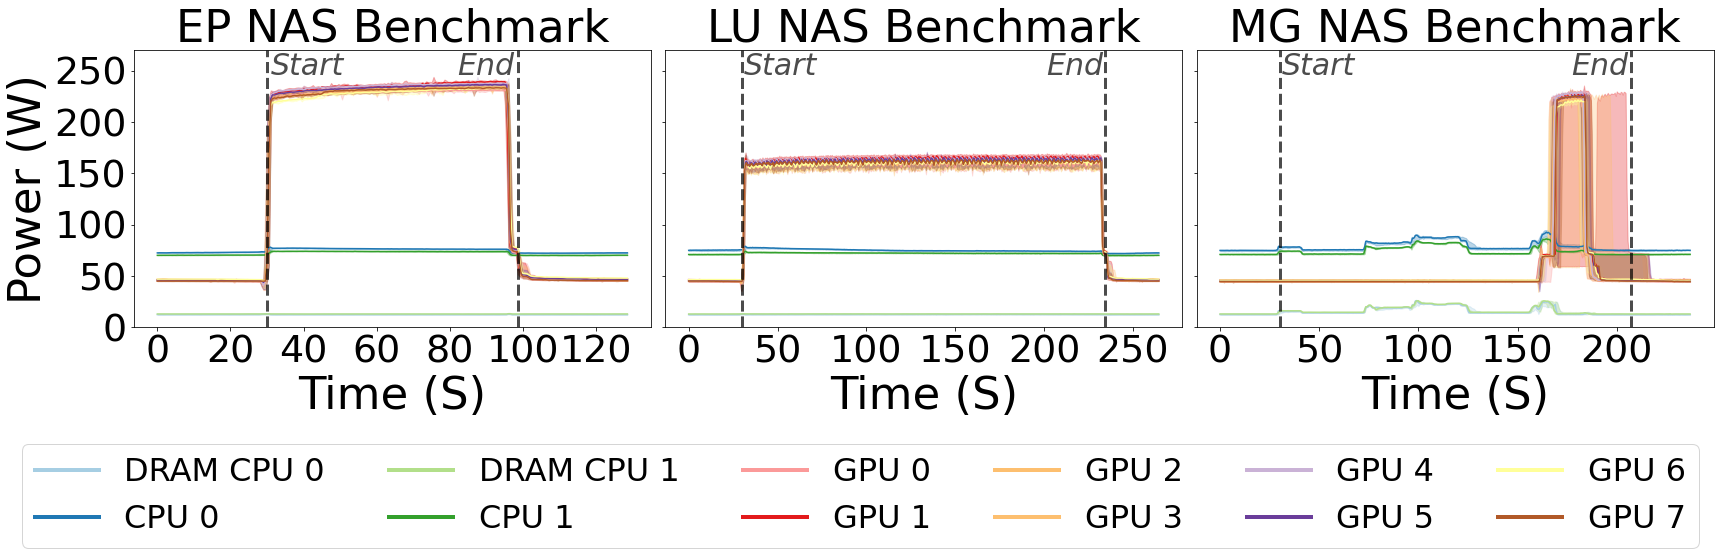

In [20]:
from matplotlib.pyplot import legend


COLOR = plt.cm.Paired
cols = [col for col in b_df.columns.unique() if 'arch' in col and not ('gpu' in col and 'dram' in col)]
cols = [
    'arch.0.data.edram(W)',
    'arch.0.data.ecpu(W)',
    'arch.1.data.edram(W)',
    'arch.1.data.ecpu(W)',
    'arch.gpu-nvidia-0.data.ecpu(W)',
    'arch.gpu-nvidia-1.data.ecpu(W)',
    'arch.gpu-nvidia-2.data.ecpu(W)',
    'arch.gpu-nvidia-3.data.ecpu(W)',
    'arch.gpu-nvidia-4.data.ecpu(W)',
    'arch.gpu-nvidia-5.data.ecpu(W)',
    'arch.gpu-nvidia-6.data.ecpu(W)',
    'arch.gpu-nvidia-7.data.ecpu(W)',
 ]
fontsize = 45
legend_fontsize = 32
ymin,ymax=0,270
ressources_fig, ressources_axes, ressources_labels = plot_subplot_per_appli_per_class(
    exp_table[exp_table['gpu_0_appli']!="idle"].sort_values(by=['gpu_0_appli']), 
    b_df, 
    cols, 
    fontsize, 
    [' ', '-', ' '], 
    COLOR, 
    legend_fontsize=legend_fontsize,
    FIGSIZE=(24,6),
    bench_plot_fct=plot_quantiles_of_one_bench, 
    stat_cols=['min', '50%', 'max'],
    plot_limits=(ymin,ymax), 
    if_col_legend=True, 
    if_bench_legend=False,
    bbox_to_anchor=(1,1),
    loc='upper left',
    nb_cols=3,
    )
leg = ressources_axes[0][0].get_legend()
print(leg)
for i in range(len(ressources_axes[0])):
    ressources_axes[0][i].get_legend().remove()

    # Adding left and right vertical lignes with labels
    # Start line
    line_position_x = 30 # Time before launch of benchmarks
    text_position_x = line_position_x + 1

    ressources_axes[0][i].vlines(line_position_x, ymin=ymin, ymax=ymax, color='black', alpha=0.7, linewidth=3, linestyle='--') # 
    ressources_axes[0][i].text(text_position_x, ymax-2, "Start", fontsize=FONTSIZE-10, ha='left', va='top', alpha=0.7, fontstyle= 'italic',)
    
    # End line
    # Assuming the right marge is equal to the left one
    line_position_x = ressources_axes[0][i].get_xbound()[1] - 30 - abs(ressources_axes[0][i].get_xbound()[0])
    text_position_x = line_position_x - 1
    
    ressources_axes[0][i].vlines(line_position_x, ymin=ymin, ymax=ymax, color='black', alpha=0.7, linewidth=3, linestyle='--') # 
    ressources_axes[0][i].text(text_position_x, ymax-2, "End", fontsize=FONTSIZE-10, ha='right', va='top', alpha=0.7, fontstyle= 'italic',)

ressources_fig.tight_layout()
ressources_fig.legend(
    leg.get_lines(), 
    ressources_labels, 
    bbox_to_anchor=(0.5,0), 
    loc='upper center',
    fontsize=legend_fontsize,
    ncol=6,
)
ressources_fig.tight_layout()
ressources_fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/timeserie_ressource_plots.png",
    bbox_inches='tight',)
ressources_fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/timeserie_ressource_plots.pdf",
    bbox_inches='tight',)

## To visualize all experiments

/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


ValueError: too many values to unpack (expected 2)

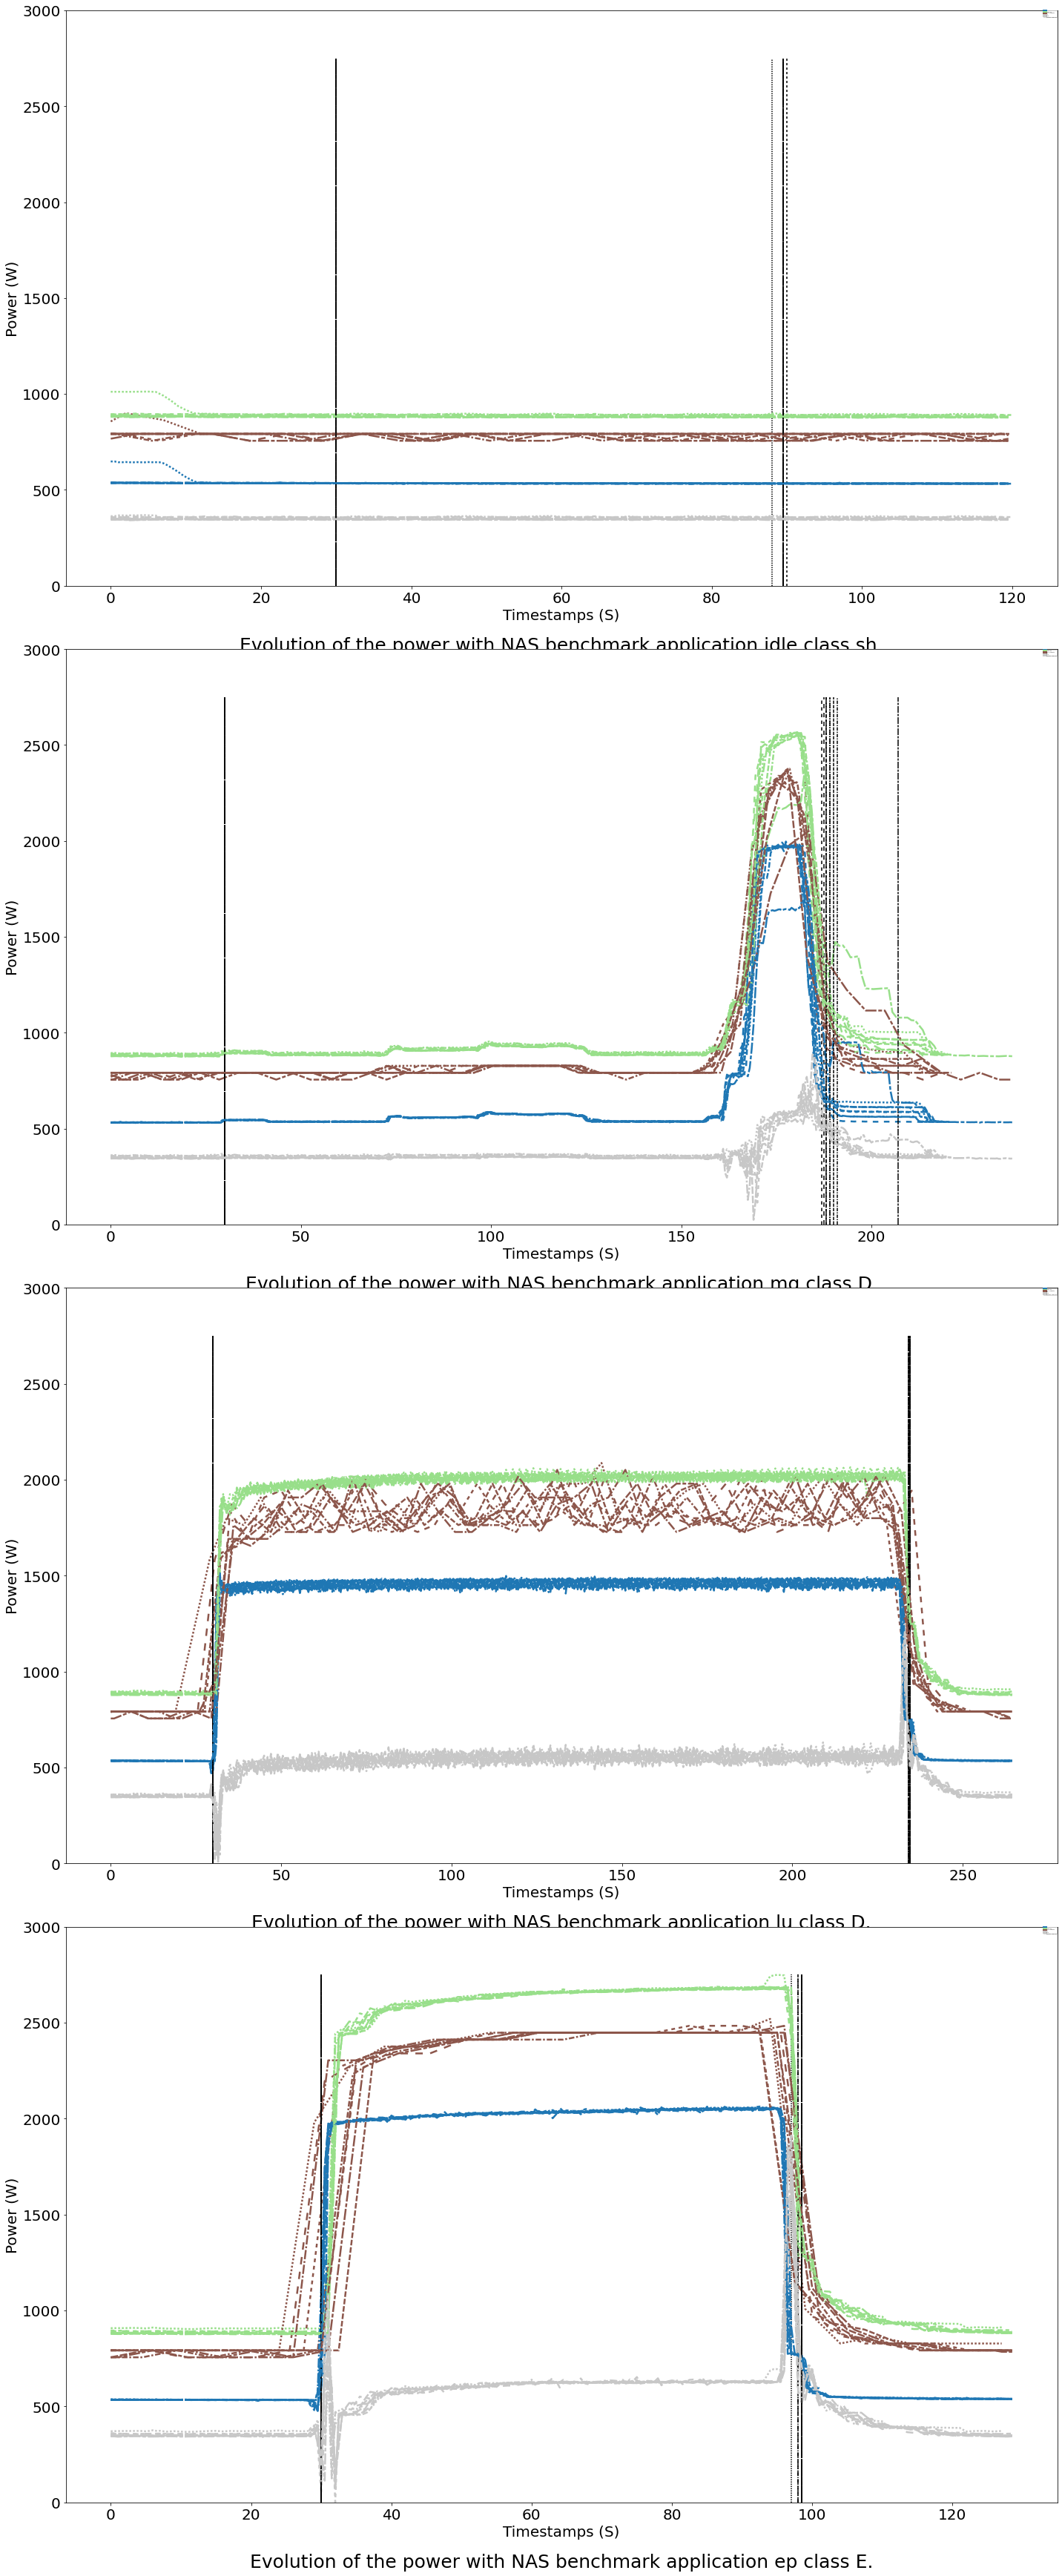

In [16]:
COLOR = plt.cm.tab20
cols = [col for col in b_df.columns.unique() if 'watt' in col or 'total' in col]
fig, axes = plot_subplot_per_appli_per_class(
    exp_table[(exp_table['tool_on_one_process']==False)], 
    b_df, 
    cols, 
    20, 
    LINESTYLES, 
    COLOR, 
    plot_limits=(0, 3000),
    if_bench_legend=False,
)
fig.tight_layout()

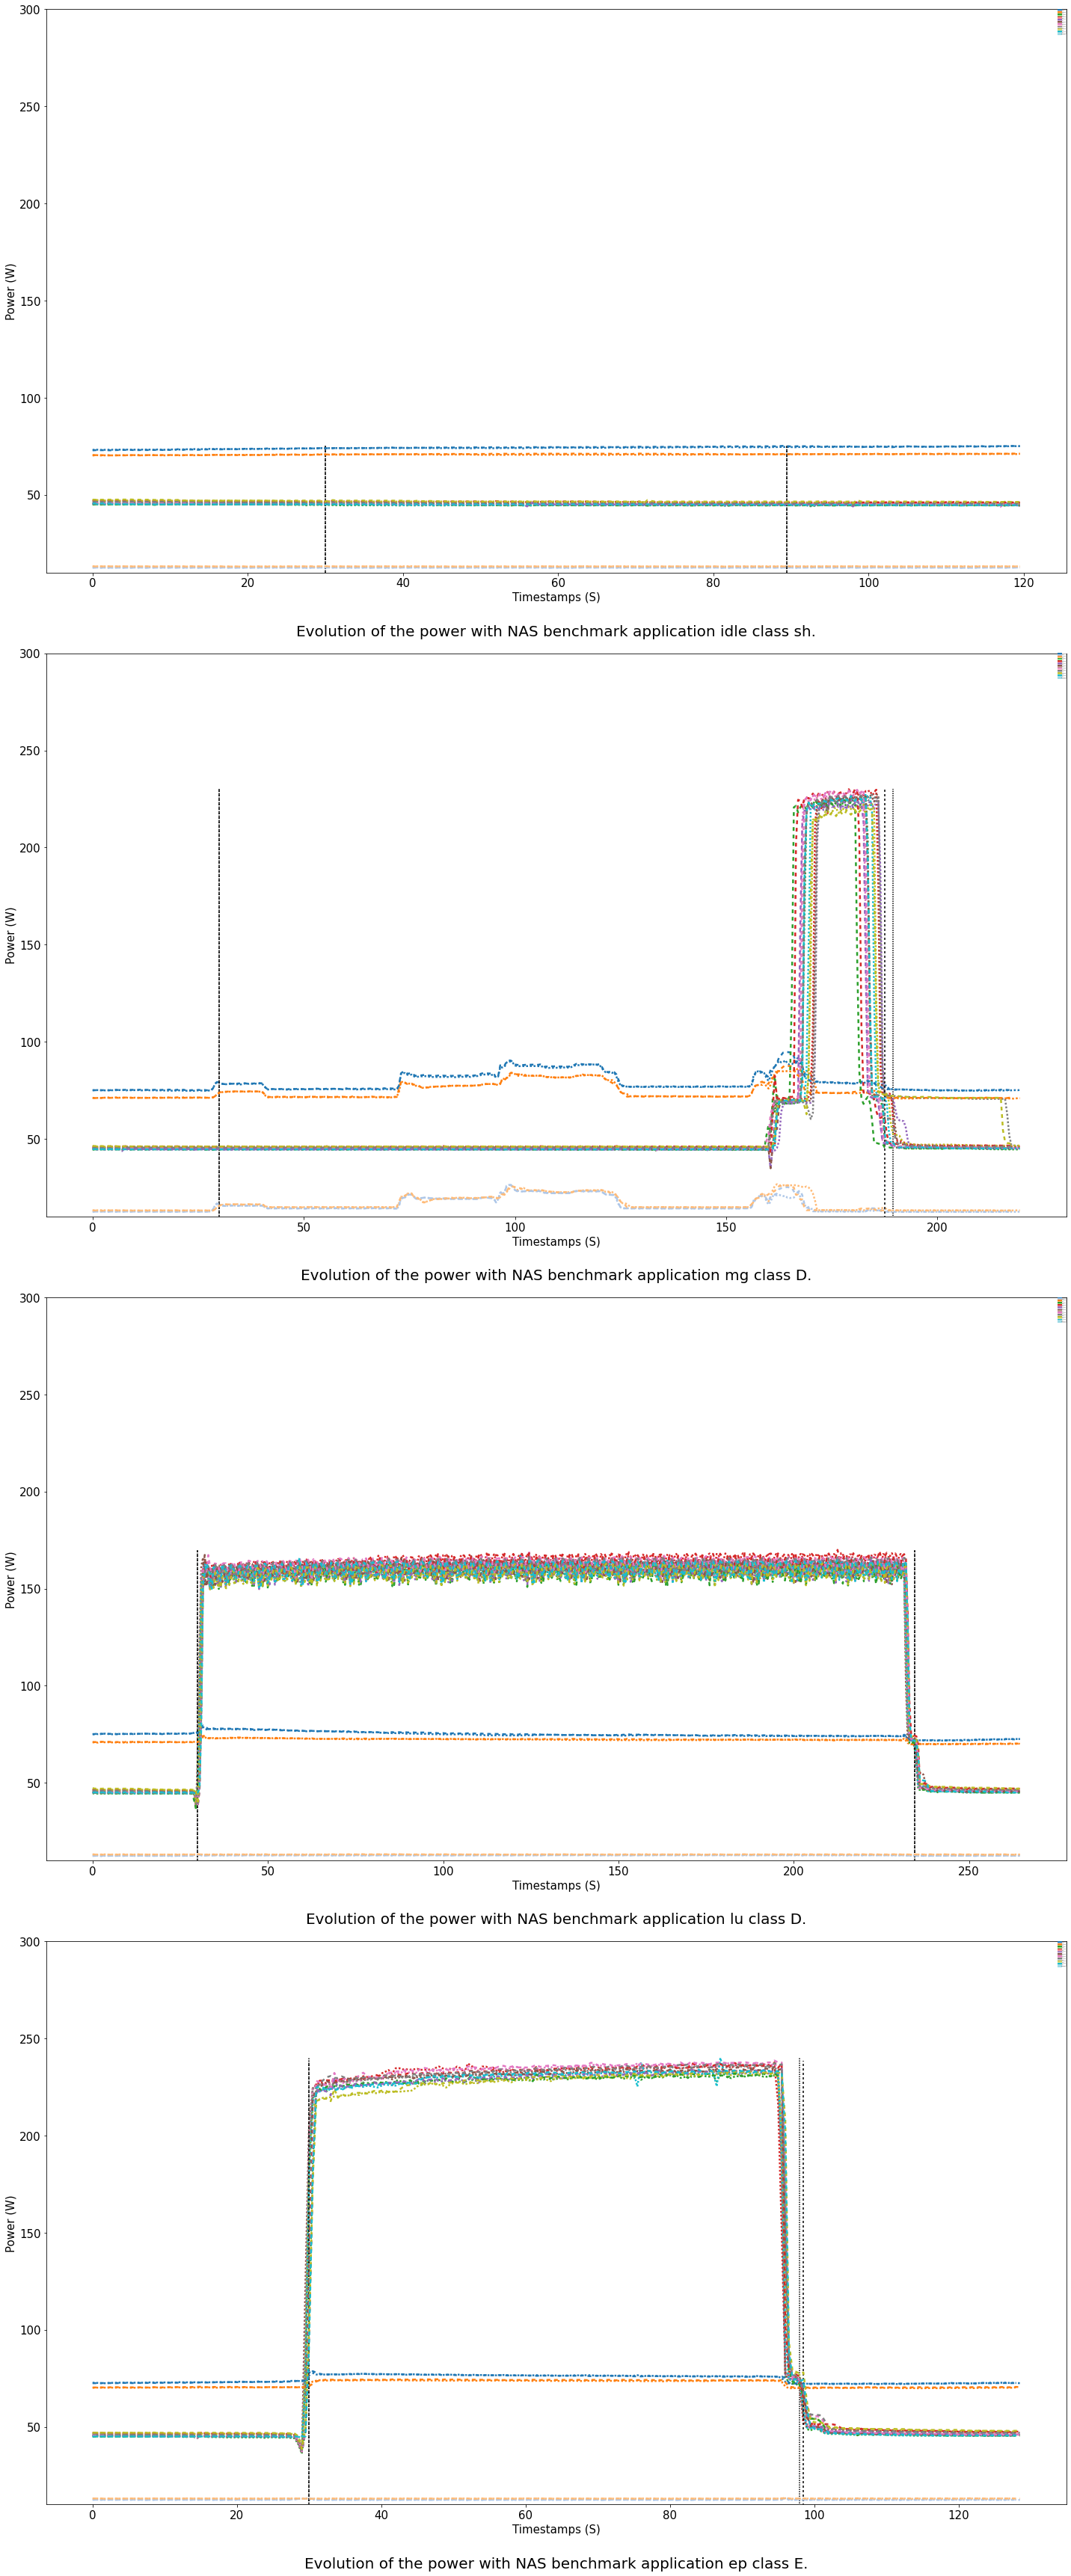

In [ ]:
COLOR = plt.cm.tab20
cols = [col for col in b_df.columns.unique() if 'arch' in col]
#table = exp_table[exp_table.apply(filter, axis=1)]
fig, axes = plot_subplot_per_appli_per_class(
    exp_table[(exp_table['tool_on_one_process']==True)], 
    b_df, 
    cols, 
    15, 
    LINESTYLES, COLOR, 
    plot_limits=(10,300), 
    if_bench_legend=False,
    )
fig.tight_layout()

/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/mathildepro/miniforge3/envs/impact_tracker_python7/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


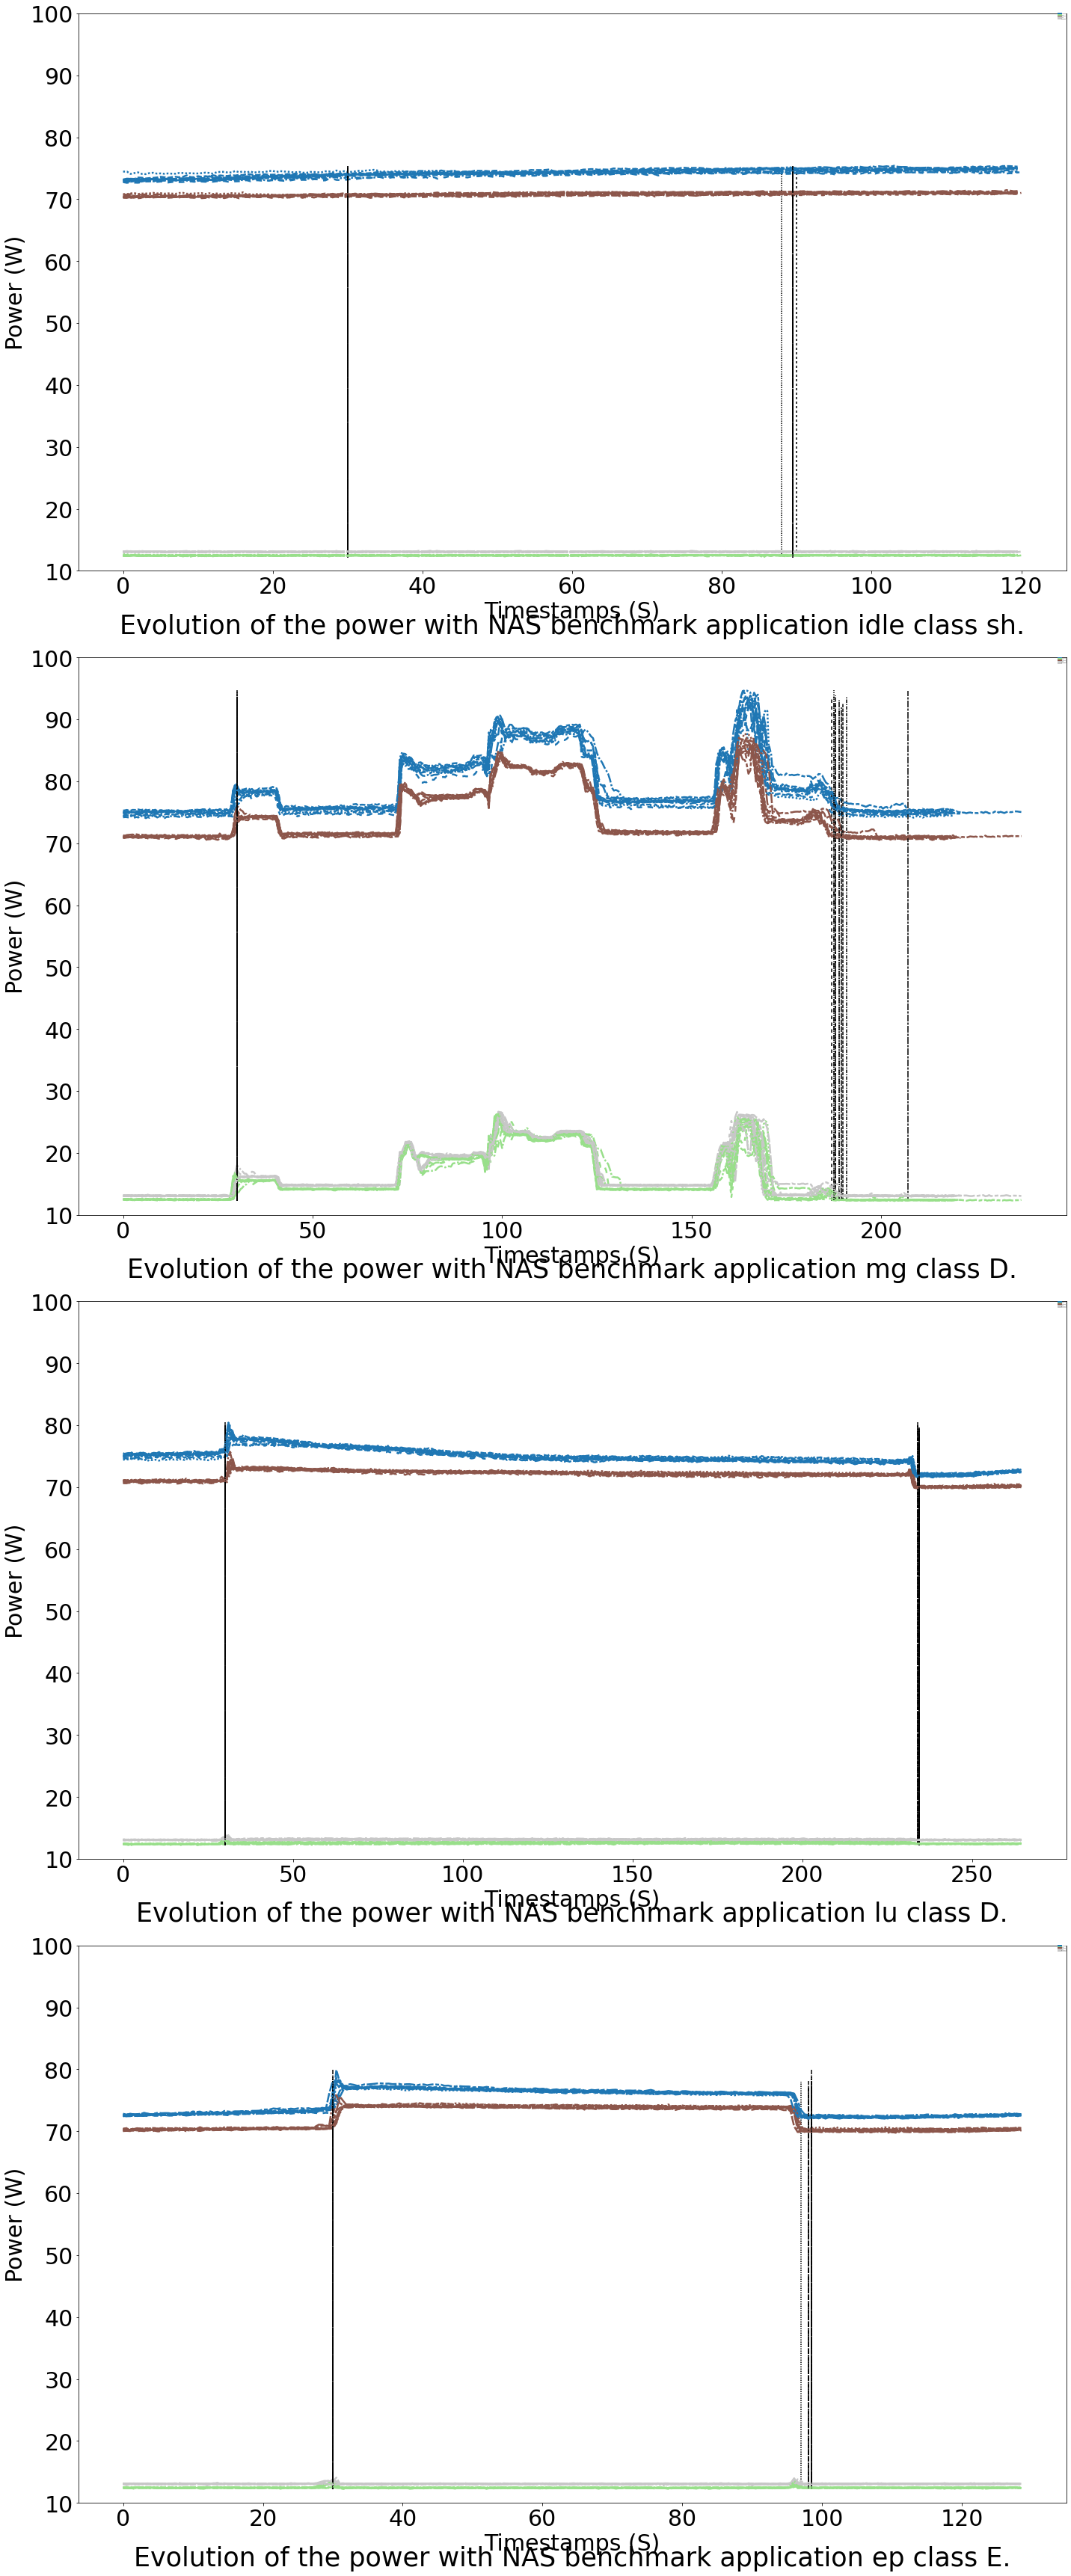

In [ ]:
cols = [col for col in b_df.columns.unique() if 'nvidia' not in col and 'arch' in col]
fig, axes = plot_subplot_per_appli_per_class(
    exp_table, 
    b_df, 
    cols, 
    FONTSIZE, 
    LINESTYLES, 
    COLOR, 
    plot_limits=(10,100), 
    if_bench_legend=False,
    )
fig.tight_layout()